In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
%pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [5]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [6]:
filename = r'UrbanSound8K\UrbanSound8K\audio\fold1\7061-6-0-0.wav'

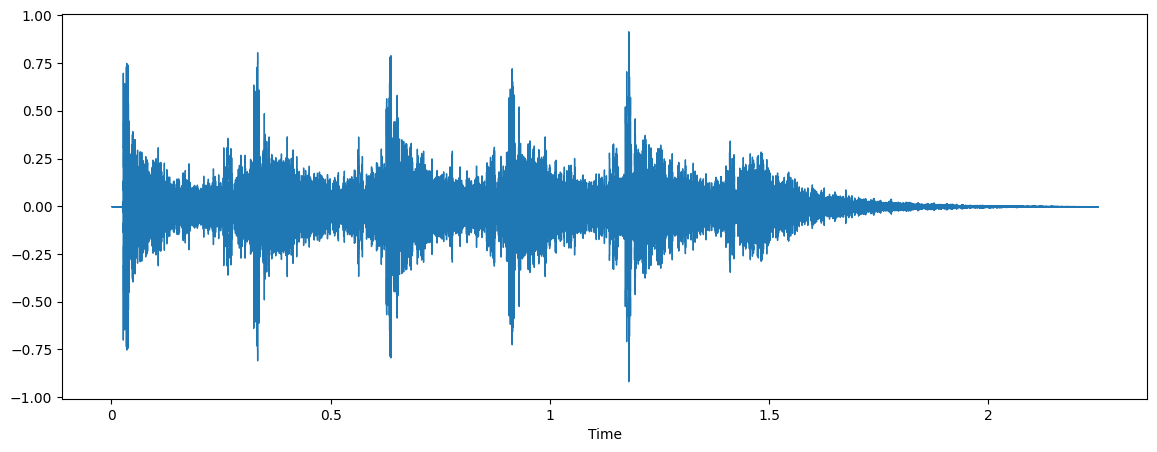

In [7]:
# Gun Shot
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

In [8]:
sample_rate  # we are reading the value from librosa
# librosa is helpful because it will be converting the sterio sound
# to the mono sound and will change the sample rate as per the requirement

22050

In [9]:
# getting the data from scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)
wave_sample_rate

44100

In [10]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install numpy

In [12]:
import pandas as pd
metadata = pd.read_csv(r'UrbanSound8K\UrbanSound8K\metadata\UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [13]:
# check if the data is imbalanced
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

Audio Classification and Data Preprocessing

In [14]:
#  let's read a sample audio using librosa
audio_file_path = r'UrbanSound8K\UrbanSound8K\audio\fold6\204240-0-0-31.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [15]:
print(librosa_audio_data, librosa_sample_rate)

[0.00992757 0.01231114 0.00804608 ... 0.04364181 0.04076102 0.04242642] 22050


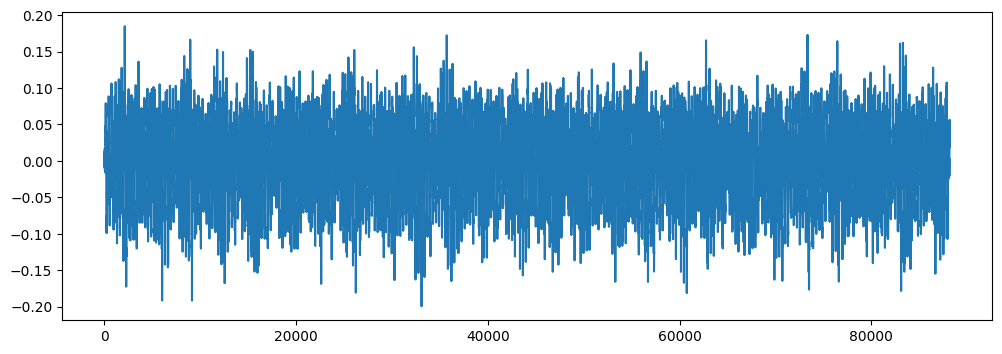

In [16]:
# let's plot the librosa audio data

# original audio with 1 channel
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)
ipd.Audio(audio_file_path)

# Observation

Librosa converts the signal into a mono, meaning the channel will always be 1, whereas in sterio is should be 2.

Librosa converts to mono.

In [17]:
# Let's try read with scipy

from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [18]:
wave_audio

array([[ 95582208, -36551424],
       [ 91987456, -38669056],
       [ 87518464, -39311616],
       ...,
       [188851456, -12845056],
       [184152576, -11455232],
       [178623232,  -8541440]])

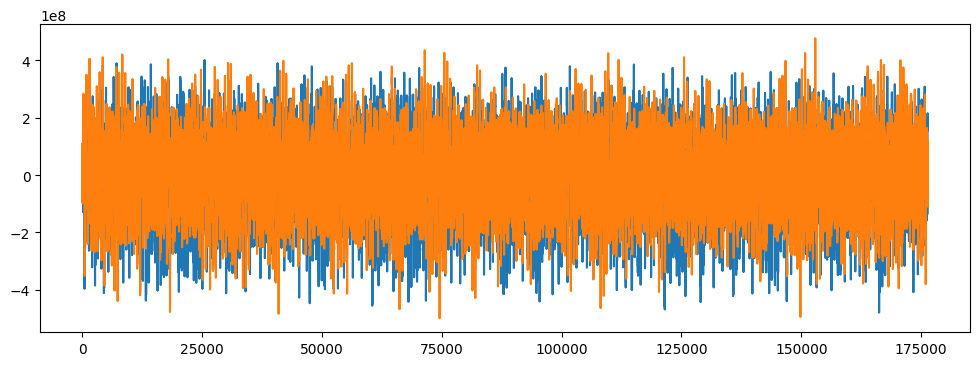

In [19]:
# plot this channel using matplotlib

# original audio with 2 channels
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

## Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients (MFCC) from the audio samples. The MFCC summarises the frequency distribution acress the window size, so it is possible to analyze both the ferquency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [20]:
mfccs = librosa.feature.mfcc(y= librosa_audio_data, sr= librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [21]:
import numpy as np
mfccs_scaled = np.mean(mfccs.T, axis=0)
print(mfccs_scaled)
print(mfccs)

[-3.3041367e+02  2.4728409e+02 -2.2519091e+01  1.6231117e+01
  8.0863743e+00  3.6338952e+00  1.4488435e+01  2.7761884e+00
  6.8238368e+00  7.6098452e+00  2.9425735e+00  3.2958045e+00
 -3.2764035e-01 -6.2335181e-01  4.5077653e+00  7.0105023e+00
  3.5418017e+00 -4.4657149e+00 -7.6703072e+00 -1.1722496e+00
  4.5487076e-01 -1.2137161e+00  2.5989294e+00 -5.2866286e-01
 -6.4262271e+00 -5.7835498e+00 -4.0002084e+00 -1.5650145e+00
 -3.2911664e-01  7.0847547e-01  4.4295168e+00  5.6016989e+00
  1.5543957e+00 -2.6198575e+00 -5.9222012e+00 -7.4590578e+00
 -3.5659039e+00  2.9238400e-01 -4.9517444e-01 -1.8735905e-01]
[[-3.8444443e+02 -3.6522357e+02 -3.3236652e+02 ... -2.9460983e+02
  -2.9025305e+02 -2.8604239e+02]
 [ 1.9291089e+02  2.3236368e+02  2.4984915e+02 ...  2.5328255e+02
   2.2247879e+02  1.6560440e+02]
 [ 2.0908455e+01 -4.0886064e+00 -2.6994543e+01 ... -3.1731827e+01
  -6.9013743e+00  1.9880543e+01]
 ...
 [-1.4458368e+00  8.2513297e-01 -4.8591747e+00 ...  8.8769972e-01
   2.1675289e+00  6.3

In [22]:
#  Extracting the MFCC's for every audio file
import pandas as pd

audio_dataset_path = r'UrbanSound8K\UrbanSound8K\audio'
metadata = pd.read_csv(r'UrbanSound8K\UrbanSound8K\metadata\UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [23]:
def features_extractor(file):
  audio, sample_rate = librosa.load(file_name)
  mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
  
  # to scale the features like take the mean of the features and replace it with the list of the features
  mfccs_scaled_features = np.mean(mfccs_features.T, axis =0)
  return mfccs_scaled_features

In [24]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [25]:
import numpy as np
from tqdm import tqdm
import os

#  Now we iterate through every audio file and extract features
# using the MFCC

extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
  file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold'+str(row['fold'])+'/',str(row['slice_file_name']))
  final_class_labels = row['class']
  data = features_extractor(file_name)
  extracted_features.append([data, final_class_labels])

3it [00:00, 24.60it/s]

3555it [02:15, 29.58it/s]C:\Users\Krishan Walia\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [05:26, 35.42it/s]C:\Users\Krishan Walia\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\Krishan Walia\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [05:43, 25.45it/s]


In [26]:
# converting extracted features to Pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-211.93698, 62.581203, -122.81315, -60.745293...",dog_bark
1,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.578068, 43.195866,...",children_playing
3,"[-406.47922, 91.1966, -25.043556, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86223, -42.658783, 50.690277,...",children_playing


In [27]:
# split the dataset into independent and dependent dataset
X = np.array(extracted_features_df['feature'].tolist())
Y = np.array(extracted_features_df['class'].tolist())

In [28]:
X.shape

(8732, 40)

In [29]:
Y.shape

(8732,)

In [30]:
# # Label Encoding
# Y = np.array(pd.get_dummies(Y)) 
# get dummies do that [1, 0, 0, 0, 0, 0...] for separate values

# By using label encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = to_categorical(labelencoder.fit_transform(Y))

In [31]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
Y.shape

(8732, 10)

In [33]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [34]:
print(X_train.shape, X_test.shape)

(6985, 40) (1747, 40)


In [35]:
print(Y_test.shape, Y_train.shape)

(1747, 10) (6985, 10)


DATA PREPROCESSING IS COMPLETE TILL HERE. (PART 2 DONE)

We will use deep learning model to classify the audio

## Model Creation

In [36]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [37]:
%pip install sklearn

  Using cached sklearn-0.0.post9.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [38]:
import tensorflow as tf

In [39]:
print(tf.__version__)

2.13.0


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [41]:
# No of classes
num_labels = Y.shape[1]

In [42]:
model = Sequential()

# First Layer
model.add(Dense(350, input_shape=(40,))) # 40 because we hade 40 features in the dataset
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Second Layer
model.add(Dense(700))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Third Layer
model.add(Dense(350))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Final Layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 350)               14350     
                                                                 
 activation (Activation)     (None, 350)               0         
                                                                 
 dropout (Dropout)           (None, 350)               0         
                                                                 
 dense_1 (Dense)             (None, 700)               245700    
                                                                 
 activation_1 (Activation)   (None, 700)               0         
                                                                 
 dropout_1 (Dropout)         (None, 700)               0         
                                                                 
 dense_2 (Dense)             (None, 350)               2

In [44]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [54]:
# Training the Model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 150
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', verbose=1, save_best_only= True)

start = datetime.now()

model.fit(X_train,Y_train,batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, Y_test), callbacks=[checkpointer])

duration = datetime.now()-start

print("Training completed in time: ", duration)


Epoch 1/150


214/219 [============================>.] - ETA: 0s - loss: 0.3594 - accuracy: 0.8908
Epoch 1: val_loss improved from inf to 0.35415, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 9ms/step - loss: 0.3572 - accuracy: 0.8911 - val_loss: 0.3542 - val_accuracy: 0.8930
Epoch 2/150
214/219 [============================>.] - ETA: 0s - loss: 0.3379 - accuracy: 0.8998
Epoch 2: val_loss did not improve from 0.35415
219/219 [==============================] - 2s 9ms/step - loss: 0.3384 - accuracy: 0.8998 - val_loss: 0.3702 - val_accuracy: 0.8895
Epoch 3/150
213/219 [============================>.] - ETA: 0s - loss: 0.4382 - accuracy: 0.8828
Epoch 3: val_loss did not improve from 0.35415
219/219 [==============================] - 2s 9ms/step - loss: 0.4380 - accuracy: 0.8820 - val_loss: 0.3978 - val_accuracy: 0.8821
Epoch 4/150
217/219 [============================>.] - ETA: 0s - loss: 0.4148 - accuracy: 0.8867
Epoch 4: val_loss did not improve 

In [61]:
test_accuracy = model.evaluate(X_test,Y_test, verbose=0)
print(test_accuracy[1])

0.8935317397117615


TESTING THE MODEL

In [69]:
filename = r'UrbanSound8K\UrbanSound8K\audio\fold4\195969-0-0-26.wav'
audio, sample_rate = librosa.load(filename)
mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
predicted_label = np.argmax(model.predict(mfccs_scaled_features),axis=1)

predicted_class = labelencoder.inverse_transform(predicted_label)

ipd.Audio(filename)

1/1 [==============================] - 0s 40ms/step


In [72]:
print(predicted_class[0])
# metadata[metadata['slice_file_name'] == filename.split("\\")[-1]]

air_conditioner
